In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization

In [2]:
df = pd.read_csv("adult.csv")

# view dimensions of dataset
df.shape

(32560, 15)

In [3]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# we dont seem to have column names in this. Let's add those in.

#Rename column names
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
# Let's review the various columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [7]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [8]:
# check missing values in categorical variables

df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

Summary of categorical variables
•	There are 9 categorical variables.
•	The categorical variables are given by workclass, education, marital_status, occupation, relationship, race, sex, native_country and income.
•	income is the target variable.

In [9]:
#We can see that there are no missing values in the categorical variables
# view frequency counts of values in categorical variables

for var in categorical:

  print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [10]:
# Let's convert this to %, so that we can consolidate some categories

In [11]:
# view frequency distribution of categorical variables

for var in categorical:

  print(df[var].value_counts()/np.float(len(df)))



 Private             0.697052
 Self-emp-not-inc    0.078041
 Local-gov           0.064281
 ?                   0.056388
 State-gov           0.039834
 Self-emp-inc        0.034275
 Federal-gov         0.029484
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322512
 Some-college    0.223925
 Bachelors       0.164435
 Masters         0.052918
 Assoc-voc       0.042445
 11th            0.036087
 Assoc-acdm      0.032770
 10th            0.028655
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013299
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459951
 Never-married            0.328071
 Divorced                 0.136456
 Separated                0.031480
 Widowed                  0.030498
 Married-spouse-absent    0.012838
 Married-AF-spouse        0.000706
Name:

C:\Users\Admin\AppData\Local\Temp\ipykernel_11948\1060134625.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))
C:\Users\Admin\AppData\Local\Temp\ipykernel_11948\1060134625.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))
C:\Users\Admin\App

In [12]:
# check labels in workclass variable

df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [13]:

# check frequency distribution of values in workclass variable

df.workclass.value_counts()


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [14]:
# replace '?' values in workclass variable with `NaN`


df['workclass'].replace('?',np.NaN,inplace=True)


In [15]:
# check labels in occupation variable

df.occupation.unique()


array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [16]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [17]:
# replace '?' values in occupation variable with `NaN`

df['occupation'].replace('?',np.NaN,inplace=True)

In [18]:
# check labels in native_country variable

df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [19]:

# check frequency distribution of values in native_country variable

df.native_country.value_counts()


 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [20]:
#We can see that there are 583 values encoded as ? in native_country variable. I will replace these ? with NaN.
# replace '?' values in native_country variable with `NaN`

df['native_country'].replace('?',np.NaN,inplace=True)



In [21]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [22]:
# find numerical variables

numerical=[var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :',numerical)



There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [23]:
# view the numerical variables

df[numerical].head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [24]:
# check missing values in numerical variables

df[numerical].isnull().sum()



age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [25]:
X=df.drop(['income'],axis=1)

y=df['income']
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)



In [26]:
# impute missing categorical variables with most frequent value

for df2 in[X_train,X_test]:
	df2['workclass'].fillna(X_train['workclass'].mode()[0],inplace=True)
	df2['occupation'].fillna(X_train['occupation'].mode()[0],inplace=True)
	df2['native_country'].fillna(X_train['native_country'].mode()[0],inplace=True)


In [27]:
import category_encoders as ce

#We have downloaded encoders and use one-hot encoding

In [28]:
# encode remaining variables with one-hot encoding

encoder =ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
'race', 'sex', 'native_country'])

X_train=encoder.fit_transform(X_train)

X_test=encoder.transform(X_test)

In [29]:
X_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
20721,32,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32097,45,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25205,47,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23491,37,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12367,24,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,23,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19648,19,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,43,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10799,21,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
cols=X_train.columns

In [31]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb=GaussianNB()


# fit the model
gnb.fit(X_train,y_train)

GaussianNB()

In [32]:
# Predict the results 

y_pred=gnb.predict(X_test)

y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [33]:
#Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy score: 0.7993


In [34]:
y_pred_train=gnb.predict(X_train)

y_pred_train

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [35]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train)))

Training-set accuracy score: 0.7920


In [36]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)

print('Confusion matrix\n\n',cm)

print('\nTrue Positives(TP) = ',cm[0,0])

print('\nTrue Negatives(TN) = ',cm[1,1])

print('\nFalse Positives(FP) = ',cm[0,1])

print('\nFalse Negatives(FN) = ',cm[1,0])


Confusion matrix

 [[7076  378]
 [1582  732]]

True Positives(TP) =  7076

True Negatives(TN) =  732

False Positives(FP) =  378

False Negatives(FN) =  1582


In [37]:
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      7454
        >50K       0.66      0.32      0.43      2314

    accuracy                           0.80      9768
   macro avg       0.74      0.63      0.65      9768
weighted avg       0.78      0.80      0.77      9768



In [38]:
#Classification accuracy
TP=cm[0,0]
TN=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]


# print classification accuracy

classification_accuracy=(TP+TN)/float(TP+TN+FP+FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.7993


In [39]:
# print classification error

classification_error=(FP+FN)/float(TP+TN+FP+FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.2007


In [40]:
# print precision score

precision=TP/float(TP+FP)


print('Precision : {0:0.4f}'.format(precision))



Precision : 0.9493


In [41]:
recall=TP/float(TP+FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))


Recall or Sensitivity : 0.8173


In [42]:
true_positive_rate=TP/float(TP+FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate=FP/float(FP+TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity=TN/(TN+FP)

print('Specificity : {0:0.4f}'.format(specificity))



True Positive Rate : 0.8173
False Positive Rate : 0.3405
Specificity : 0.6595


In [43]:
#Calculate class probabilities 
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob=gnb.predict_proba(X_test)[0:10]

y_pred_prob



array([[9.87076209e-01, 1.29237907e-02],
       [9.82719131e-01, 1.72808694e-02],
       [9.96437663e-01, 3.56233675e-03],
       [9.99548245e-01, 4.51754768e-04],
       [9.90444197e-01, 9.55580263e-03],
       [9.79718962e-01, 2.02810377e-02],
       [9.80011271e-01, 1.99887291e-02],
       [9.94971744e-01, 5.02825600e-03],
       [9.82097974e-01, 1.79020265e-02],
       [9.99352316e-01, 6.47683850e-04]])

In [44]:
# store the probabilities in dataframe

y_pred_prob_df=pd.DataFrame(data=y_pred_prob,columns=['Prob of - <=50K','Prob of - >50K'])

y_pred_prob_df


,Prob of - <=50K,Prob of - >50K
0,0.987076,0.012924
1,0.982719,0.017281
2,0.996438,0.003562
3,0.999548,0.000452
4,0.990444,0.009556
5,0.979719,0.020281
6,0.980011,0.019989
7,0.994972,0.005028
8,0.982098,0.017902
9,0.999352,0.000648


In [45]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10,1]



array([0.01292379, 0.01728087, 0.00356234, 0.00045175, 0.0095558 ,
       0.02028104, 0.01998873, 0.00502826, 0.01790203, 0.00064768])

In [46]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1=gnb.predict_proba(X_test)[:,1]



Text(0, 0.5, 'Frequency')

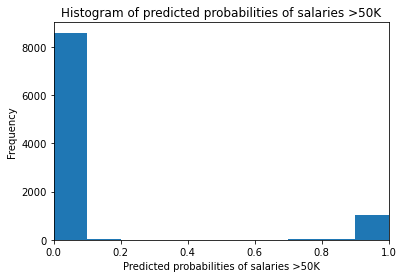

In [47]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size']=10


# plot histogram with 10 bins
plt.hist(y_pred1,bins=10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


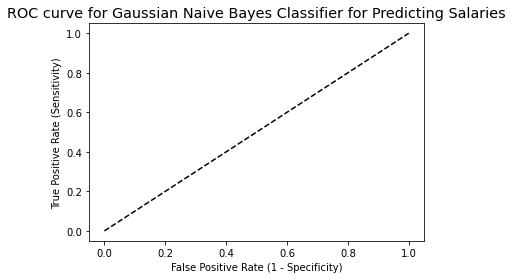

In [48]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [49]:
from sklearn.metrics import roc_auc_score

ROC_AUC=roc_auc_score(y_test,y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))


ROC AUC : 0.8384


In [50]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC=cross_val_score(gnb,X_train,y_train,cv=5,scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))


Cross validated ROC AUC : 0.8300


In [51]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores=cross_val_score(gnb,X_train,y_train,cv=10,scoring='accuracy')


print('Cross-validation scores:{}'.format(scores))



Cross-validation scores:[0.79385965 0.78903509 0.79069767 0.79596314 0.78806494 0.78806494
 0.79815709 0.78938131 0.79640193 0.78894252]


Results and conclusion 
1.	In this project, we built a Gaussian Naïve Bayes Classifier model to predict whether a person makes over 50K a year. The model yields a very good performance as indicated by the model accuracy which was found to be 0.8083.
2.	The training-set accuracy score is 0.8067 while the test-set accuracy to be 0.8083. These two values are quite comparable. So, there is no sign of overfitting.
3.	I have compared the model accuracy score which is 0.8083 with null accuracy score which is 0.7582. So, we can conclude that our Gaussian Naïve Bayes classifier model is doing a very good job in predicting the class labels.
4.	ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a very good job in predicting whether a person makes over 50K a year.
5.	Using the mean cross-validation, we can conclude that we expect the model to be around 80.63% accurate on average.
6.	If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 81.35% accuracy to 79.64% accuracy. So, we can conclude that the model is independent of the particular folds used for training.
7.	Our original model accuracy is 0.8083, but the mean cross-validation accuracy is 0.8063. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.